ANN MODEL FOR MNIST DATASET

In [1]:
#loading the dataset

import tensorflow as tf
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Understanding the data(images and labels)

In [2]:
x_train.shape

#60,000 training images of 28x28.As 28x28x3 is not there=>dataset images are GRAYSCALE and not colour images

(60000, 28, 28)

In [3]:
y_train.shape

#60,000 images will have 60,000 labels.Labels:0,1,2,3,4....9(10 categories)

(60000,)

In [4]:
x_test.shape

#test data has 10,000 28x28 grayscale images

(10000, 28, 28)

In [5]:
y_test.shape

#10,000 images have 10,000 labels

(10000,)

In [6]:
x_train[300].shape

#every image is 28x28 and grayscale

(28, 28)

In [7]:
y_train

#not one-hot encoded

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

NORMALIZATION

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
classes=[0,1,2,3,4,5,6,7,8,9]

9


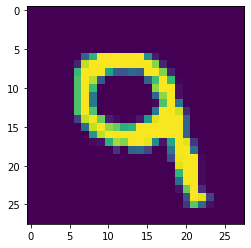

In [10]:
ind=1194
import matplotlib.pyplot as plt
print(classes[y_train[ind]])
plt.imshow(x_train[ind])
plt.show()


NEURAL NETWORK ARCHITECTURE

1.Input layers:Flatten:

2.Hidden layers:activation=relu:Dense:100 neurons

3.Output layer:10 neurons:activation=softmax(multi-class classification problem):Dense

In [11]:
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout

In [12]:
#create model
model=Sequential()

#input layer:
model.add(Flatten())

#hidden layer:
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))



#dropout layer:
model.add(Dropout(0.4))

#o/p layer:
model.add(Dense(10,activation='softmax'))




In [13]:
#compile the model:
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [14]:
#callbacks to avoid overfitting:

from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [15]:
#train the model
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 8s 2ms/step - loss: 0.5684 - accuracy: 0.8210 - val_loss: 0.1328 - val_accuracy: 0.9604
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1461 - accuracy: 0.9583 - val_loss: 0.1064 - val_accuracy: 0.9675
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0963 - accuracy: 0.9734 - val_loss: 0.1072 - val_accuracy: 0.9707
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9757 - val_loss: 0.0989 - val_accuracy: 0.9738
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9810 - val_loss: 0.1037 - val_accuracy: 0.9728
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9830 - val_loss: 0.0906 - val_accuracy: 0.9750
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9855 - val_loss: 0.1041 - val_ac

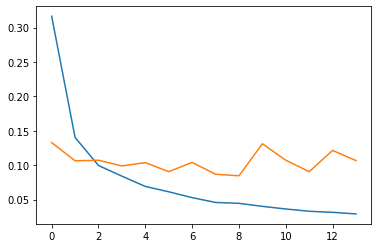

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

TESTING ACCURACY:

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [18]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [19]:
accuracy_score(y_pred,y_test)

0.9781

In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       984
           1       0.99      0.99      0.99      1140
           2       0.97      0.98      0.98      1026
           3       0.98      0.97      0.97      1024
           4       0.97      0.98      0.98       974
           5       0.98      0.98      0.98       891
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1013
           8       0.97      0.97      0.97       966
           9       0.98      0.96      0.97      1024

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [21]:
confusion_matrix(y_pred,y_test)

array([[ 969,    0,    4,    0,    1,    3,    1,    2,    2,    2],
       [   0, 1127,    5,    0,    0,    0,    2,    1,    2,    3],
       [   1,    1, 1004,    3,    2,    0,    0,   13,    2,    0],
       [   0,    1,    4,  991,    0,    9,    0,    3,   11,    5],
       [   1,    0,    1,    0,  956,    1,    6,    2,    2,    5],
       [   1,    1,    0,    5,    0,  870,    6,    0,    6,    2],
       [   5,    2,    2,    0,    4,    3,  941,    1,    0,    0],
       [   0,    0,    5,    3,    1,    0,    0,  997,    1,    6],
       [   2,    3,    7,    3,    1,    4,    2,    2,  941,    1],
       [   1,    0,    0,    5,   17,    2,    0,    7,    7,  985]])

SAVE THE MODEL

In [22]:
model.save('mnist-ANN.hdf5')

In [23]:
x_test[1191]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    